In [1]:
!pip install emoji
!pip install Sastrawi
!pip install google-play-scraper
!pip install umap-learn

In [2]:
import string
import re
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import umap
from google_play_scraper import Sort, reviews
from collections import Counter
warnings.filterwarnings('ignore')
sns.set(style='white', palette='muted', color_codes=True)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
result, continuation = reviews(
    'com.Info_BMKG',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=5000,
    filter_score_with=None
)

In [4]:
df = pd.DataFrame(np.array(result), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,27a862bd-d73e-4e2e-898d-eb1377494125,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ada baiknya di tambahkan alarm EWS pada aplika...,3,118,3.3.1,2024-08-13 16:07:59,None,NaT,3.3.1
1,afe756b1-ff62-4fba-8153-c2b9c85e0656,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong tambahkan banyak kota dibagian kualitas...,1,4,3.3.1,2024-09-25 07:01:35,None,NaT,3.3.1
2,54e783f9-9f3d-4c44-bb25-bdb8b597993a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tidak ada widget update cuaca 24 jam! kalah sa...,1,7,3.3.1,2024-09-11 01:12:48,None,NaT,3.3.1
3,5974970c-60f8-439c-a531-1c5146da790f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bgus aplikasi nya, semoga bisa diandalkan kaya...",5,36,3.3.1,2024-09-17 06:41:34,None,NaT,3.3.1
4,0e39d4c6-6a68-4f75-8549-7d866b7b8634,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bisa mendeteksi gempa bumi, namun kadang-kadan...",4,322,3.3.1,2024-07-16 16:21:33,None,NaT,3.3.1


In [5]:
df.sort_values(by='at', ascending=False, inplace=True)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
1633,caa962fe-4891-4e6e-a6da-6702ebb37532,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat kurang akurat,2,0,3.3.1,2024-10-07 04:44:27,None,NaT,3.3.1
451,cd15fa72-f3d8-4bbd-b9b7-562b56276a73,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pendeteksi Gempa Bumi Dan Peringatan Tsunami, ...",3,0,3.3.1,2024-10-06 23:30:06,None,NaT,3.3.1
1861,ecf04836-9de7-4eb8-a8c0-95d109d9e5ef,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Terima kasih.Sangat membantu masyarakat,5,0,3.3.1,2024-10-06 00:25:26,None,NaT,3.3.1
1632,114ce2d9-0332-4aab-b7d7-0d4675bf13e0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus lengkap akurat 👍👍👍,5,0,3.3.1,2024-10-05 22:25:38,None,NaT,3.3.1
33,a335d3c0-a1e7-4a5c-ace0-f709c23d1691,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk melihat jam pasang atau surutnya air lau...,4,0,3.3.1,2024-10-05 06:57:39,None,NaT,3.3.1
...,...,...,...,...,...,...,...,...,...,...,...
3076,0666d0e3-9b0b-424d-9200-3b6fefba7b66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sekali karena saya tinggal di rawan gemp...,5,0,2.4,2018-09-15 11:26:47,None,NaT,2.4
2971,91960812-894e-4406-9334-4fc725e7ac3b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong gan perbaharui mengenai hujan di indone...,3,1,2.4,2018-09-14 17:21:04,None,NaT,2.4
2918,d0ee1aac-29d7-48bf-aefa-73e4253f7621,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk ini sangat membantu .dan saya dpat mengeta...,5,1,2.4,2018-09-14 12:26:23,None,NaT,2.4
3142,97e9cec9-5910-4ea2-8753-543eb940375f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi keren dari BMKG, membantu sekali.",5,1,2.4,2018-09-14 02:53:36,None,NaT,2.4


In [6]:
df.shape

(5000, 11)

In [7]:
df = df.iloc[:, 3:5]
df.reset_index(drop=True, inplace=True)
df.head()

,content,score
0,sangat kurang akurat,2
1,"Pendeteksi Gempa Bumi Dan Peringatan Tsunami, ...",3
2,Terima kasih.Sangat membantu masyarakat,5
3,bagus lengkap akurat 👍👍👍,5
4,Untuk melihat jam pasang atau surutnya air lau...,4


In [8]:
# plt.figure(figsize=(10, 5))
# ax = sns.countplot(x='score', data=df, order=df.score.value_counts().index, palette='Blues_r')
# for container in ax.containers:
#     ax.bar_label(container, label_type='edge', size=10)
# plt.title('Distribution of Ratings')
# plt.show()

In [9]:
def sentiment(score):
  if score <= 2:
    return 'Negative'
  elif score >= 4:
    return 'Positive'

df['score'] = df['score'].apply(lambda x: sentiment(x))

In [10]:
df.head()

,content,score
0,sangat kurang akurat,Negative
1,"Pendeteksi Gempa Bumi Dan Peringatan Tsunami, ...",None
2,Terima kasih.Sangat membantu masyarakat,Positive
3,bagus lengkap akurat 👍👍👍,Positive
4,Untuk melihat jam pasang atau surutnya air lau...,Positive


In [11]:
# ax = df.score.value_counts().plot(kind='bar', color='skyblue')
# for container in ax.containers:
#   ax.bar_label(container, size=10, label_type='edge')
# plt.show()

In [12]:
df.isnull().sum()

,0
content,0
score,570


In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(4430, 2)

## Data Preprocessing Part 1

In [15]:
# casefolding
def casefolding(content):
  content = content.lower()
  return content

df['content'] = df['content'].apply(lambda x: casefolding(x))

In [16]:
df.head()

,content,score
0,sangat kurang akurat,Negative
2,terima kasih.sangat membantu masyarakat,Positive
3,bagus lengkap akurat 👍👍👍,Positive
4,untuk melihat jam pasang atau surutnya air lau...,Positive
5,perkiraan cuacanya ngawur banget. sdm dan tekn...,Negative


In [17]:
# cleaning
def cleaning(content):
  content = content.strip(' ') # menghapus spasi di awal dan di akhir
  content = re.sub(r'\d+', '', content) # menghapus angka
  content = content.translate(str.maketrans('','', string.punctuation)) # menghapus punctuation
  content = re.sub(r'\b[a-zA-Z]\b', '', content) # menghapus kata yang hanya terdiri dari satu huruf
  content = re.sub(r'\s+', ' ', content) # menghapus spasi berlebih
  return content

df['content'] = df['content'].apply(lambda x: cleaning(x))

In [18]:
df.head()

,content,score
0,sangat kurang akurat,Negative
2,terima kasihsangat membantu masyarakat,Positive
3,bagus lengkap akurat 👍👍👍,Positive
4,untuk melihat jam pasang atau surutnya air lau...,Positive
5,perkiraan cuacanya ngawur banget sdm dan tekno...,Negative


In [19]:
# emoji removal
def emoji_removal(content):
  content = emoji.replace_emoji(content, replace='')
  return content

df['content'] = df['content'].apply(lambda x: emoji_removal(x))

In [20]:
df.head()

,content,score
0,sangat kurang akurat,Negative
2,terima kasihsangat membantu masyarakat,Positive
3,bagus lengkap akurat,Positive
4,untuk melihat jam pasang atau surutnya air lau...,Positive
5,perkiraan cuacanya ngawur banget sdm dan tekno...,Negative


In [21]:
# emoticon removal
def remove_emoticons(content):
    emoticon_pattern = re.compile(r"""
        (?::|;|=) # Kolom, titik koma, atau tanda sama dengan untuk wajah
        (?:-)? # Tanda minus opsional
        (?:\)|\(|D|P|O|/|\\|S) # char yang menunjukkan ekspresi
        """, re.VERBOSE)

    return emoticon_pattern.sub(r'', content)

df['content'] = df['content'].apply(lambda x: remove_emoticons(x))

In [22]:
df.head()

,content,score
0,sangat kurang akurat,Negative
2,terima kasihsangat membantu masyarakat,Positive
3,bagus lengkap akurat,Positive
4,untuk melihat jam pasang atau surutnya air lau...,Positive
5,perkiraan cuacanya ngawur banget sdm dan tekno...,Negative


In [23]:
# norm
norm = {
    'gak': 'tidak',
    'bgt': 'banget',
    'yg': 'yang',
    'tp': 'tapi',
    'gimana': 'bagaimana',
    'udh': 'udah',
    'gue': 'saya',
    'emang': 'memang',
    'mau': 'ingin',
    'abis': 'habis',
    'bener': 'benar',
    'nggak': 'tidak',
    'aja': 'saja',
    'gitu': 'begitu',
    'kalo': 'kalau',
    'udah': 'sudah',
    'cuma': 'hanya',
    'tuh': 'itu',
    'utk': 'untuk',
    'dr': 'dari',
    'sy': 'saya',
    'bgus': 'bagus',
    'ucpan': 'ucapan',
    'ssudah': 'sudah',
    'ssaja': 'saja'
}

def normalize(content):
  for i in norm:
    if i in content:
      content = content.replace(i, norm[i])
  return content

df['content'] = df['content'].apply(lambda x: normalize(x))

In [24]:
df.head()

,content,score
0,sangat kurang akurat,Negative
2,terima kasihsangat membantu masayaarakat,Positive
3,bagus lengkap akurat,Positive
4,untuk melihat jam pasang atau surutnya air lau...,Positive
5,perkiraan cuacanya ngawur banget sdm dan tekno...,Negative


In [25]:
# tokenisasi
def tokenisasi(content):
  content = word_tokenize(content)
  return content

df['content'] = df['content'].apply(lambda x: tokenisasi(x))

In [26]:
df.head()

,content,score
0,"[sangat, kurang, akurat]",Negative
2,"[terima, kasihsangat, membantu, masayaarakat]",Positive
3,"[bagus, lengkap, akurat]",Positive
4,"[untuk, melihat, jam, pasang, atau, surutnya, ...",Positive
5,"[perkiraan, cuacanya, ngawur, banget, sdm, dan...",Negative


In [27]:
# stopword
factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()

nltk_stopword = stopwords.words('indonesian')

combine_stopwords = set(sastrawi_stopwords + nltk_stopword)

def stopwords(content):
  content = [word for word in content if word not in combine_stopwords]
  return content

df['content'] = df['content'].apply(lambda x: stopwords(x))

In [28]:
df.head()

,content,score
0,[akurat],Negative
2,"[terima, kasihsangat, membantu, masayaarakat]",Positive
3,"[bagus, lengkap, akurat]",Positive
4,"[jam, pasang, surutnya, air, laut, menemukannya]",Positive
5,"[perkiraan, cuacanya, ngawur, banget, sdm, tek...",Negative


In [30]:
# removal of frequent words
word_frequency_pos = df[df['score'] == 'Positive']['content']
word_frequency_neg = df[df['score'] == 'Negative']['content']

positive_words = [word for tokens in word_frequency_pos for word in tokens]
negative_words = [word for tokens in word_frequency_neg for word in tokens]

positive_freq_dic = FreqDist(positive_words)
negative_freq_dic = FreqDist(negative_words)

display(positive_freq_dic, negative_freq_dic)

FreqDist({'gempa': 960, 'aplikasi': 821, 'membantu': 755, 'bagus': 638, 'cuaca': 609, 'bmkg': 432, 'info': 404, 'informasi': 394, 'nya': 379, 'akurat': 261, ...})

FreqDist({'gempa': 433, 'aplikasi': 337, 'update': 262, 'nya': 200, 'info': 176, 'cuaca': 157, 'bmkg': 135, 'akurat': 118, 'ga': 110, 'lokasi': 108, ...})

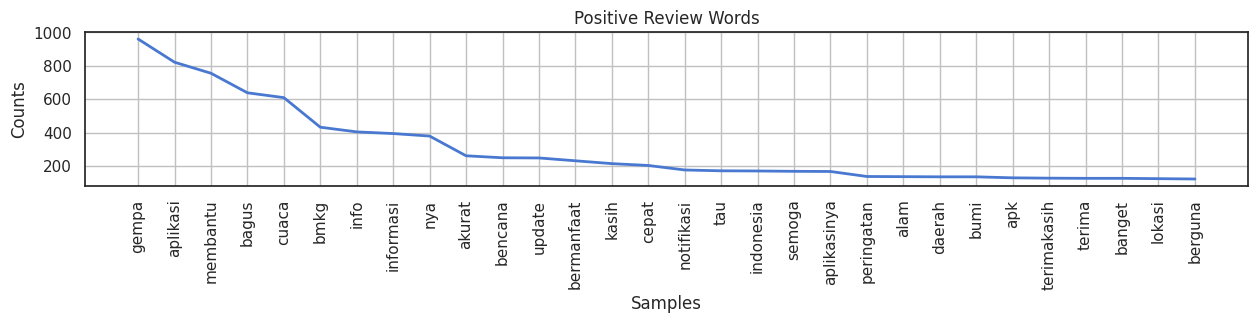

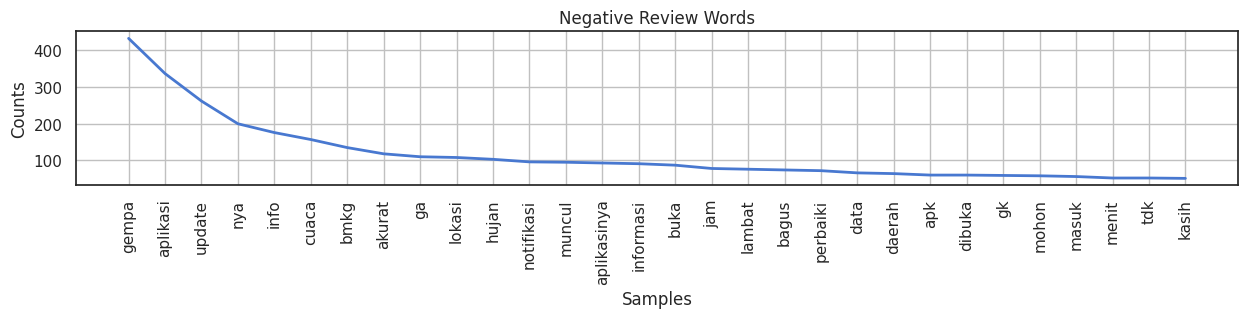

In [31]:
# visualisasi top 30 kata
plt.figure(figsize=(15,2))
positive_freq_dic.plot(30,  title='Positive Review Words');

plt.figure(figsize=(15,2))
negative_freq_dic.plot(30, title='Negative Review Words');

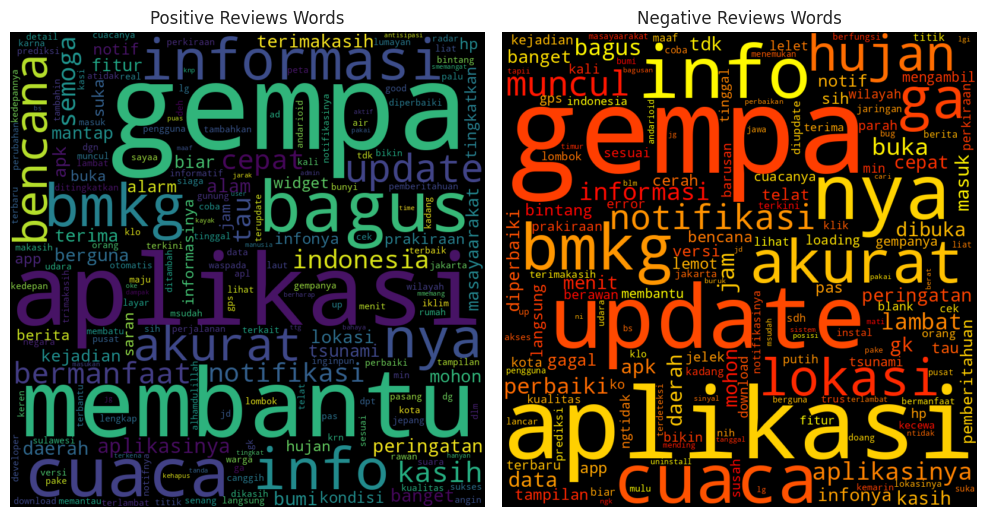

In [32]:
def plot_important_words(pos_dic, neg_dic):
    fig, ax=plt.subplots(ncols=2, figsize=(10,10))

    wc = WordCloud(background_color='black',\
                min_font_size=8, width=800, height=800,\
                        colormap=None ).generate_from_frequencies(pos_dic)
    ax[0].imshow(wc, interpolation='bilinear')
    ax[0].set_title('Positive Reviews Words')
    ax[0].axis('off');

    wc = WordCloud(background_color='black',\
               min_font_size=12, width=800, height=800,\
                     colormap='autumn' ).generate_from_frequencies(neg_dic)
    ax[1].imshow(wc, interpolation='bilinear' )
    ax[1].set_title('Negative Reviews Words')
    ax[1].axis('off');

    fig.set_tight_layout({'pad':1})

plot_important_words(positive_freq_dic, negative_freq_dic)

In [33]:
pos=set(x[0] for x in positive_freq_dic.most_common(20))
neg=set(x[0] for x in negative_freq_dic.most_common(20))

print(neg & pos)
print('\nDari', len(neg), 'kata terdapat', len(neg & pos), 'yang sama')

{'nya', 'aplikasinya', 'gempa', 'notifikasi', 'bmkg', 'info', 'cuaca', 'update', 'bagus', 'akurat', 'informasi', 'aplikasi'}

Dari 20 kata terdapat 12 yang sama


In [34]:
pos=set(x[0] for x in positive_freq_dic.most_common(100))
neg=set(x[0] for x in negative_freq_dic.most_common(100))

print(neg & pos)
print('\nDari', len(neg), 'kata terdapat', len(neg & pos), 'yang sama')

{'data', 'aplikasinya', 'tau', 'tinggal', 'diperbaiki', 'banget', 'hp', 'masuk', 'peringatan', 'jam', 'fitur', 'membantu', 'bagus', 'aplikasi', 'notif', 'cuacanya', 'daerah', 'langsung', 'download', 'wilayah', 'bmkg', 'mohon', 'cuaca', 'perbaiki', 'prakiraan', 'app', 'infonya', 'pas', 'indonesia', 'buka', 'informasi', 'orang', 'bencana', 'perkiraan', 'muncul', 'min', 'gempa', 'terkini', 'hujan', 'tsunami', 'sih', 'info', 'menit', 'kota', 'terbaru', 'pemberitahuan', 'nya', 'kasih', 'tdk', 'notifikasi', 'apk', 'ga', 'bintang', 'update', 'lokasi', 'titik', 'kejadian', 'kadang', 'biar', 'cepat', 'akurat', 'terima', 'gempanya'}

Dari 100 kata terdapat 63 yang sama


In [40]:
more_stop_word =[
    'atidakr', 'sama', 'saya', 'kalau', 'terjadi', 'untuk', 'jam', 'dini', 'tidak',
    'yang', 'bisa', 'di', 'baik', 'lama', 'lebih', 'apa', 'selalu', 'notif', 'kejadian',
    'padahal', 'bencana', 'terimakasih', 'ada', 'santidakt', 'apk', 'banget', 'banyak',
    'cuaca', 'notifikasi', 'kasih', 'hujan', 'buka', 'masuk', 'lokasi', 'sering', 'terus',
    'baru', 'app', 'jutidak', 'dulu', 'sekali', 'update', 'buat', 'kurang', 'terima', 'akurat',
    'tsunami', 'malah', 'jadi', 'baru', 'tsunami', 'semotidak', 'kok', 'alarm', 'hp', 'mengambil',
    'saran', 'indonesia', 'santidakt', 'jutidak', 'jutidak', 'apk', 'infonya', 'notifikasi', 'peringatan',
    'sayarat', 'tdk', 'terbaru', 'hujan', 'dentidakn', 'cuacanya', 'terima', 'mohon', 'barusan', 'semoga',
    'kejadian', 'muncul', 'langsung', 'kasih', 'terimakasih', 'aplikasi', 'perintidaktan', 'tingtidakl',
    'pengguna', 'tau', 'prediksi', 'info', 'biar', 'banget', 'update', 'jantidakn', 'fitur', 'ngtidak',
    'prakiraan', 'sih', 'masuk', 'gps', 'app', 'gempanya', 'data', 'nya', 'jam', 'hp', 'menit', 'kota',
    'ngtidak', 'bencana', 'daerah', 'cepat', 'buka', 'pas', 'aplikasinya', 'sesuai', 'santidakt', 'alam',
    'tampilan', 'bagus', 'pemberitahuan', 'titik', 'wilayah', 'bmkg', 'versi', 'msudah','gempa', 'min', 'ga',
    'notif', 'cuaca', 'lokasi', 'developer', 'informasi', 'bumi', 'tidaktidak1', 'masayaarakat', 'berawan', 'batidakimana',
    'perbaiki', 'widget', 'kadang', 'download', 'orang', 'klo', 'sehingtidak', 'diperbaiki', 'jepang', 'mentidakmbil',
    'bunyi', 'tidaktidakl', 'perkiraan', 'gk', 'bintang', 'cerah', 'bikin', 'kali', 'dibuka', 'ditingkatkan', 'tingtidak1', 'membantu'
]


positive2_freq_dic={key:value for key,value in positive_freq_dic.items() if key not in more_stop_word}
negative2_freq_dic={key:value for key,value in negative_freq_dic.items() if key not in more_stop_word}

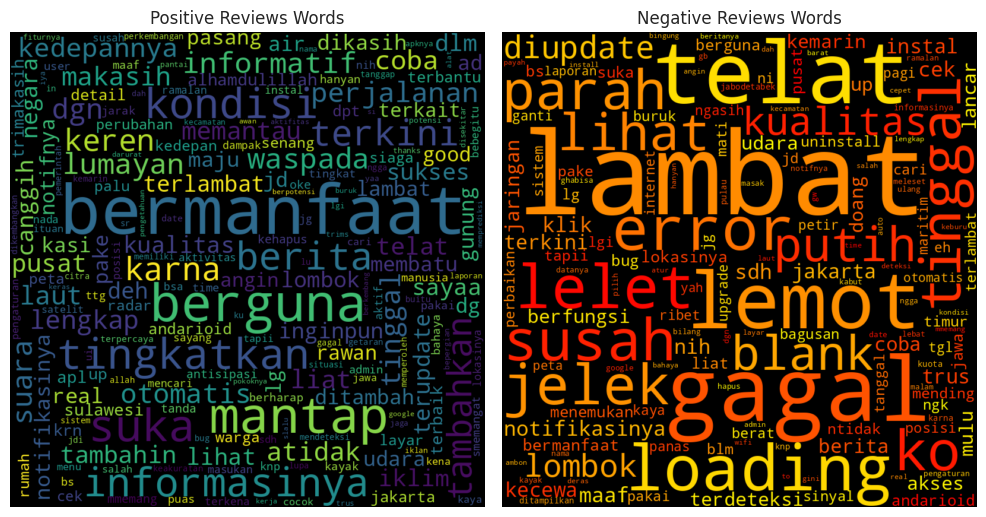

In [41]:
plot_important_words(positive2_freq_dic, negative2_freq_dic)

In [42]:
# stopword removal pt2
def more_stopword(content):
  content = [word for word in content if word not in more_stop_word]
  return content

df['content'] = df['content'].apply(lambda x: more_stopword(x))

In [43]:
df.head()

,content,score
0,[],Negative
2,[kasihsangat],Positive
3,[lengkap],Positive
4,"[pasang, surutnya, air, laut, menemukannya]",Positive
5,"[ngawur, sdm, teknologinya, katrok]",Negative


In [44]:
# stemming
def stemming(content):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = []
  for i in content:
    x = stemmer.stem(i)
    text.append(x)
  content_clean = []
  content_clean = ' '.join(text)
  print(content_clean)
  return content_clean

df['content'] = df['content'].apply(lambda x: stemming(x))

df.to_csv('bmkg_clean_data.csv')


kasihsangat
lengkap
pasang surut air laut temu
ngawur sdm teknologi katrok


oya nyuwun ngampunten geh mas bantu bansos nama budi prasetyo jragung jogotirto bah sleman rt rw lurah jogotirto bah sleman camat bah sleman yogyakarta mas mas
mantau gunung daki


notifikasi selesai notfikasi hadeh

aktif inisaya ituagar tenang keluarga rawan gempatsunami padang
coba
inti guna
tambah bagi kualitas udara pilih zoom gambar bagi
alami tingkat pesat ingin fiturnya
ngasih telat kasih contoh
akuratcuaca oanasmasa notifnya badai dtg hujannah panas dimakassarrusak alat

perfect paham kompleks kembang keren
dukung
prediksi petir petir turun

coba smoga
sr sr
mantap
letak ter
payah
kini
tapi mncul
up to date
baru depan
pop up pilih kena dampak pop up kena dampak tambah suara beda
selamat
mantap

allah manusia waspada manusia saja inismemangat
alhamdulillah manfaat
manfaat


asli
andal kayak masuk live chat komentar tuju
ckp user interface experience bs lg user friendlybravo

apknya lho ket sett on
adm

In [45]:
path = '/content/bmkg_clean_data.csv'

df_clean = pd.read_csv(path)
df_clean.drop('Unnamed: 0', axis=1, inplace=True)
df_clean.head()

,content,score
0,NaN,Negative
1,kasihsangat,Positive
2,lengkap,Positive
3,pasang surut air laut temu,Positive
4,ngawur sdm teknologi katrok,Negative


In [46]:
df_clean.shape

(4430, 2)

In [47]:
df_clean.isnull().sum()

,0
content,381
score,0


In [48]:
df_clean.dropna(inplace=True)

In [49]:
df_clean.shape

(4049, 2)

In [50]:
df_clean.head()

,content,score
1,kasihsangat,Positive
2,lengkap,Positive
3,pasang surut air laut temu,Positive
4,ngawur sdm teknologi katrok,Negative
7,oya nyuwun ngampunten geh mas bantu bansos nam...,Positive


In [51]:
df_clean.rename(columns={'content': 'review', 'score': 'sentiment'}, inplace=True)
df_clean.head()

,review,sentiment
1,kasihsangat,Positive
2,lengkap,Positive
3,pasang surut air laut temu,Positive
4,ngawur sdm teknologi katrok,Negative
7,oya nyuwun ngampunten geh mas bantu bansos nam...,Positive


In [52]:
df_clean.reset_index(drop=True, inplace=True)
df_clean.head()

,review,sentiment
0,kasihsangat,Positive
1,lengkap,Positive
2,pasang surut air laut temu,Positive
3,ngawur sdm teknologi katrok,Negative
4,oya nyuwun ngampunten geh mas bantu bansos nam...,Positive


In [54]:
df_clean.to_csv('bmkg_clean_data.csv')

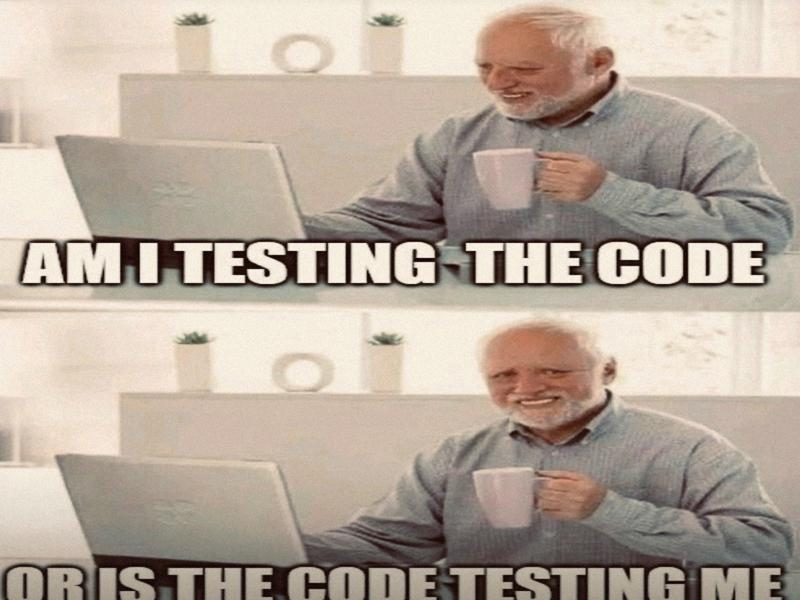

In [60]:
from IPython.display import Image

Image(filename='/content/resized_image.jpg')